In [ ]:
#  Step 1: Import required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

4.11.0


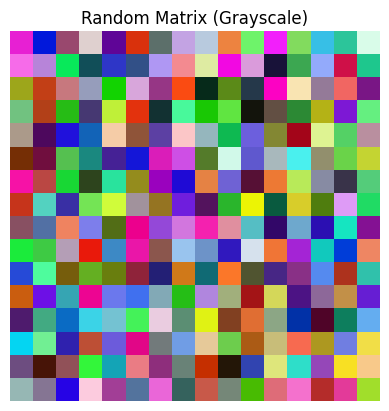

In [47]:
# 📌 Step 2: Generate a random MxN matrix (values 0-255)
M, N = 16,16  # Define matrix size
random_matrix = np.random.randint(0, 255, (M, N,3), dtype=np.uint8)

# Display the random grayscale image
plt.imshow(random_matrix, cmap='gray')
plt.title("Random Matrix (Grayscale)")
plt.axis("off")
plt.show()

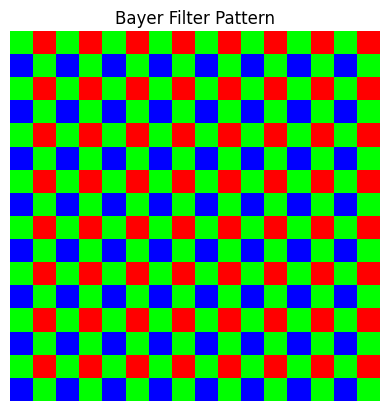

In [48]:
# step 3 Generate a correct form of Bayer filter

def generate_bayer_pattern(height, width):
    bayer = np.zeros((height, width, 3), dtype=np.uint8)
    bayer[0::2, 0::2, 1] = 255  # Green at (even, even)
    bayer[0::2, 1::2, 0] = 255  # Red at (even, odd)
    bayer[1::2, 0::2, 2] = 255  # Blue at (odd, even)
    bayer[1::2, 1::2, 1] = 255  # Green at (odd, odd)
    
    return bayer


bayer_image = generate_bayer_pattern(M, N)


# Display the Bayer pattern
plt.imshow(bayer_image)
plt.axis("off")
plt.title("Bayer Filter Pattern")
plt.show()

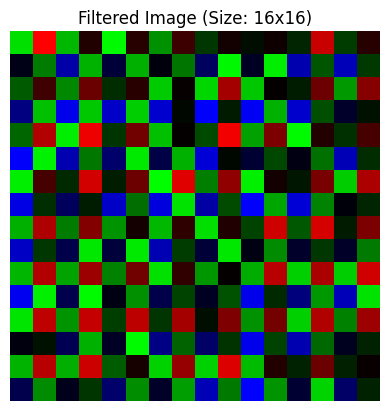

In [49]:
filtered_image = bayer_image * random_matrix
plt.title(f"Filtered Image (Size: {M}x{N})")
plt.axis("off")
plt.imshow(filtered_image)
plt.show()

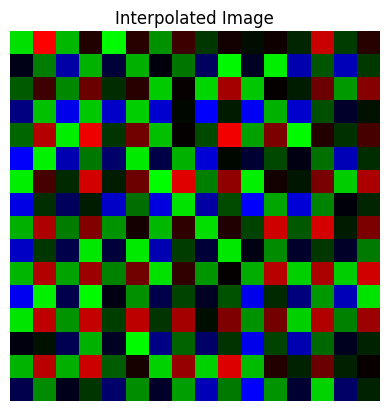

In [50]:
demosaiced_image = cv2.resize(filtered_image, (M, N), interpolation=cv2.INTER_LINEAR)
plt.title("Demosaiced Image")
plt.imshow(demosaiced_image)
plt.title('Interpolated Image')
plt.axis('off')
plt.show()


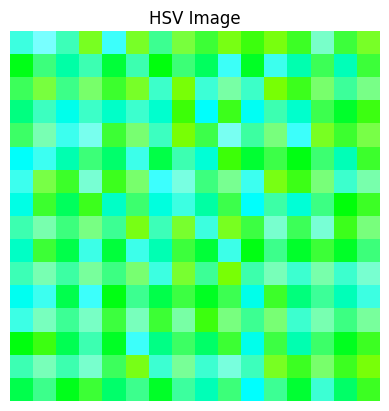

In [51]:
Hsv_image = cv2.cvtColor(demosaiced_image, cv2.COLOR_BGR2HSV)
plt.imshow(Hsv_image)
plt.title('HSV Image')
plt.axis('off')
plt.show()